### **0. Set-up**

In [85]:
# Import libraries and utils
%run '../../utils.ipynb'

In [86]:
# Load NL predicted
raw_nl_pred = pd.read_csv("../../../data/gpt-3.5-turbo-0125/processed/nl/f4.csv")

In [87]:
# Load EN predicted
raw_en_pred = pd.read_csv("../../../data/gpt-3.5-turbo-0125/processed/en/f4.csv")

# Drop rows in EN SimLex that are missing in NL SimLex
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'awful')].index)
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'terrible')].index)

# Reset index
raw_en_pred = raw_en_pred.reset_index(drop=True)

In [88]:
# Show results
raw_nl_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,oud,nieuw,0.05,0.25,0.14,0.50,0.01,0.01,0.01,1.00,1.0,1.00,1.00,0.10,0.12,0.14,0.60
1,slim,intelligent,0.80,0.85,0.00,1.00,4.50,4.50,4.96,1.00,1.0,0.67,4.00,0.95,0.95,4.49,0.95
2,hard,moeilijk,0.10,0.40,0.00,0.20,0.50,0.01,1.05,0.00,0.0,0.00,1.00,0.20,0.05,1.10,0.10
3,gelukkig,vrolijk,0.50,0.75,0.71,0.60,3.50,3.50,3.83,1.00,0.0,1.00,3.00,0.90,0.90,3.48,0.85
4,hard,stoer,0.20,0.40,0.29,0.40,2.00,2.00,2.37,0.00,0.0,0.67,2.00,0.70,0.60,3.15,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,samenvoegen,verwerven,2.20,1.25,2.00,0.50,0.40,0.50,0.43,0.60,3.0,0.33,0.36,0.50,0.25,1.53,0.17
993,sturen,bijwonen,0.00,0.04,0.00,0.00,0.05,0.00,0.07,0.00,0.0,0.00,0.00,0.00,0.00,0.06,0.00
994,verzamelen,bijwonen,1.00,0.10,1.00,0.20,0.05,0.10,0.27,0.00,0.0,0.00,0.00,0.00,0.00,0.43,0.00
995,opnemen,intrekken,0.50,0.04,0.00,0.20,0.10,0.20,0.19,0.00,1.0,0.00,0.00,0.00,0.00,0.18,0.00


In [89]:
# Show results
raw_en_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,old,new,0.05,2.0,0.05,0.01,0.19,0.08,1.00,0.08,0.15,0.15,0.50,0.05,0.27,1.13,0.05
1,smart,intelligent,4.50,5.0,0.95,0.95,0.83,1.00,0.90,1.00,1.00,0.87,0.95,0.95,1.00,4.00,0.95
2,hard,difficult,4.50,4.0,0.85,0.80,0.70,0.95,0.90,0.96,0.85,0.78,0.90,0.95,0.82,3.00,0.95
3,happy,cheerful,4.00,4.0,0.85,0.80,0.84,0.95,0.80,0.75,0.70,0.85,0.85,0.80,0.90,3.00,0.85
4,hard,easy,1.00,1.0,0.15,0.03,0.26,0.08,0.10,0.23,0.25,0.23,0.20,0.10,0.37,1.00,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,join,acquire,0.40,0.5,0.60,0.33,0.32,0.40,0.53,0.70,0.55,0.50,0.40,0.55,0.50,0.41,0.40
993,send,attend,0.20,0.3,0.20,0.17,0.32,0.20,0.33,0.40,0.35,0.30,0.40,0.25,0.25,0.36,0.00
994,gather,attend,0.40,0.3,0.30,0.17,0.32,0.20,0.42,0.50,0.45,0.40,0.50,0.35,0.50,0.37,0.25
995,absorb,withdraw,0.20,0.1,0.20,0.17,0.16,0.20,0.09,0.10,0.10,0.10,0.25,0.25,0.50,0.33,0.00


### **1. Data Processing**

In [90]:
# Copy dataframe
nl_pred = raw_nl_pred.copy()

# List of columns to scale
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Scale the similarity scores from 0-5 to 0-10
nl_pred[similarity_cols] = nl_pred[similarity_cols] * 2

# Calculate the mean SimLex-999
nl_pred['nl_pred_sl'] = nl_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
nl_pred['nl_pred_sd'] = nl_pred[similarity_cols].std(axis=1).round(2)

# Select columns
nl_pred = nl_pred[['word1', 'word2', 'nl_pred_sl', 'nl_pred_sd']]

# Show results
nl_pred

,word1,word2,nl_pred_sl,nl_pred_sd
0,oud,nieuw,0.79,0.83
1,slim,intelligent,4.08,3.64
2,hard,moeilijk,0.63,0.82
3,gelukkig,vrolijk,3.27,2.74
4,hard,stoer,2.02,2.01
...,...,...,...,...
992,samenvoegen,verwerven,1.87,1.73
993,sturen,bijwonen,0.03,0.05
994,verzamelen,bijwonen,0.42,0.69
995,opnemen,intrekken,0.32,0.54


In [91]:
# Copy dataframe
en_pred = raw_en_pred.copy()

# List of columns to scale
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Scale the similarity scores from 0-5 to 0-10
en_pred[similarity_cols] = en_pred[similarity_cols] * 2

# Calculate the mean SimLex-999
en_pred['en_pred_sl'] = en_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
en_pred['en_pred_sd'] = en_pred[similarity_cols].std(axis=1).round(2)

# Select columns
en_pred = en_pred[['word1', 'word2', 'en_pred_sl', 'en_pred_sd']]

# Show results
en_pred

,word1,word2,en_pred_sl,en_pred_sd
0,old,new,0.77,1.13
1,smart,intelligent,3.31,2.97
2,hard,difficult,2.92,2.53
3,happy,cheerful,2.79,2.39
4,hard,easy,0.68,0.70
...,...,...,...,...
992,join,acquire,0.95,0.21
993,send,attend,0.54,0.21
994,gather,attend,0.72,0.21
995,absorb,withdraw,0.37,0.24


In [92]:
# Concatenate NL and EN DataFrames
conc = pd.concat([nl_pred, en_pred], axis=1)

# Show results
conc

,word1,word2,nl_pred_sl,nl_pred_sd,word1,word2,en_pred_sl,en_pred_sd
0,oud,nieuw,0.79,0.83,old,new,0.77,1.13
1,slim,intelligent,4.08,3.64,smart,intelligent,3.31,2.97
2,hard,moeilijk,0.63,0.82,hard,difficult,2.92,2.53
3,gelukkig,vrolijk,3.27,2.74,happy,cheerful,2.79,2.39
4,hard,stoer,2.02,2.01,hard,easy,0.68,0.70
...,...,...,...,...,...,...,...,...
992,samenvoegen,verwerven,1.87,1.73,join,acquire,0.95,0.21
993,sturen,bijwonen,0.03,0.05,send,attend,0.54,0.21
994,verzamelen,bijwonen,0.42,0.69,gather,attend,0.72,0.21
995,opnemen,intrekken,0.32,0.54,absorb,withdraw,0.37,0.24


### **2. Descriptive Statistics**

In [93]:
# Summary statistics SimLex-999
nl_pred_sl_summary = round(nl_pred['nl_pred_sl'].describe(), 2)
en_pred_sl_summary = round(en_pred['en_pred_sl'].describe(), 2)

# Add median SimLex-999
nl_pred_sl_summary['median'] = round(nl_pred['nl_pred_sl'].median(), 2)
en_pred_sl_summary['median'] = round(en_pred['en_pred_sl'].median(), 2)

# Summary statistics standard deviations
nl_pred_sd_summary = round(nl_pred['nl_pred_sd'].describe(), 2)
en_pred_sd_summary = round(en_pred['en_pred_sd'].describe(), 2)

# Add median standard deviation
nl_pred_sd_summary['median'] = round(nl_pred['nl_pred_sd'].median(), 2)
en_pred_sd_summary['median'] = round(en_pred['en_pred_sd'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "nl_pred_sl": nl_pred_sl_summary,
    "en_pred_sl": en_pred_sl_summary,
    "nl_pred_sd": nl_pred_sd_summary,
    "en_pred_sd": en_pred_sd_summary
})

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,997.00,997.00,997.00,997.00
mean,3.39,2.72,1.70,1.39
std,2.41,2.08,0.96,0.91
min,0.00,0.02,0.01,0.04
25%,1.31,1.05,0.92,0.59
50%,3.16,2.10,1.67,1.23
75%,5.21,4.01,2.46,2.12
max,8.87,9.17,4.22,3.71
median,3.16,2.10,1.67,1.23


#### **2.1. SimLex-999**

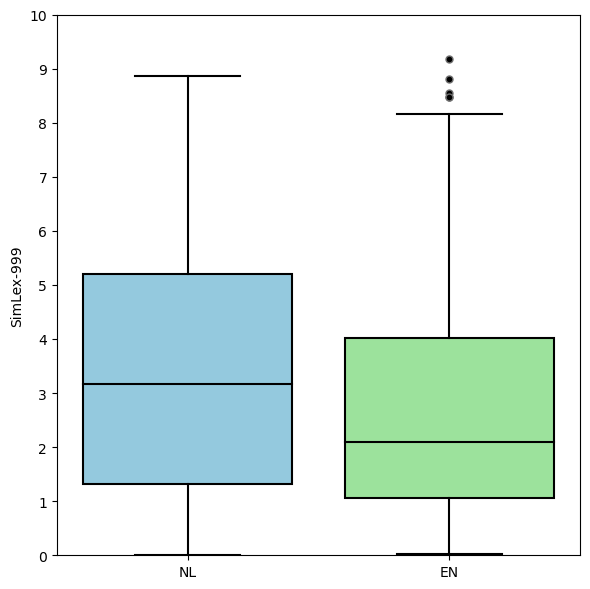

In [94]:
# Rename columns and copy
renamed_nl_pred_sl = nl_pred.rename(columns={"nl_pred_sl": "SimLex-999"}).copy()
renamed_en_pred_sl = en_pred.rename(columns={"en_pred_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_nl_pred_sl['Score'] = 'NL'
renamed_en_pred_sl['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sl, renamed_en_pred_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **2.2. Standard Deviation**

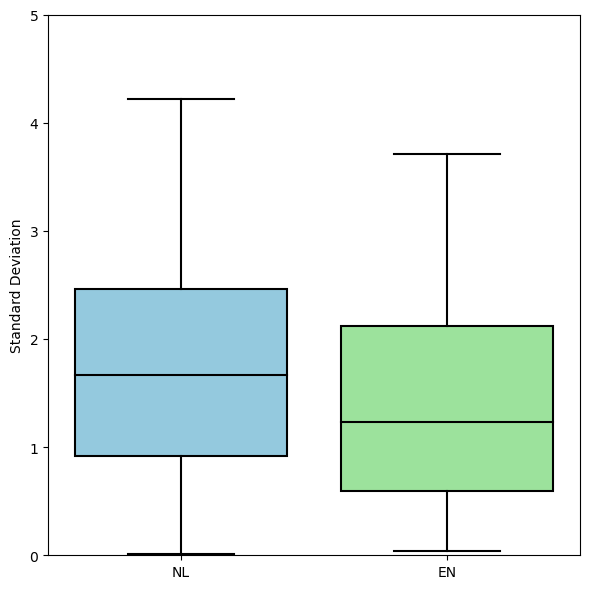

In [95]:
# Rename columns and copy
renamed_nl_pred_sd = nl_pred.rename(columns={"nl_pred_sd": "Standard Deviation"}).copy()
renamed_en_pred_sd = en_pred.rename(columns={"en_pred_sd": "Standard Deviation"}).copy()

# Create dummy label
renamed_nl_pred_sd['Score'] = 'NL'
renamed_en_pred_sd['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sd, renamed_en_pred_sd])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='Standard Deviation',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('Standard Deviation')
# plt.title('Comparison of Standard Deviation')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 5)  # Setting y-axis limits from 0 to 5

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **3. Distributions**

#### **3.1. SimLex-999**

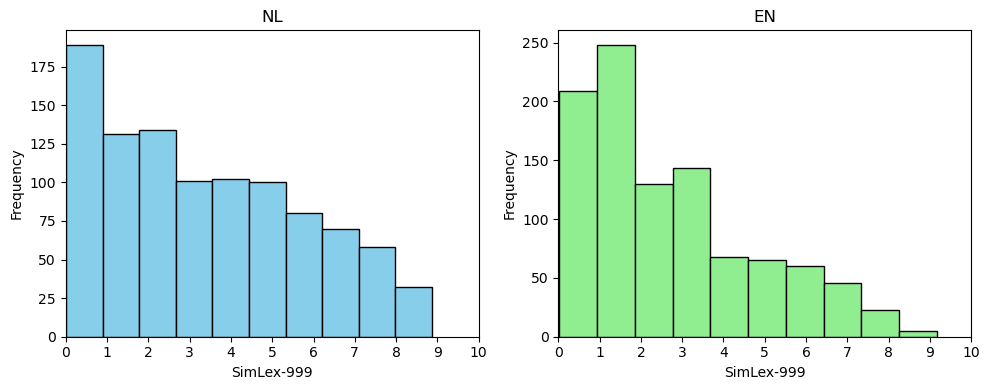

In [96]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **3.2. Standard Deviation**

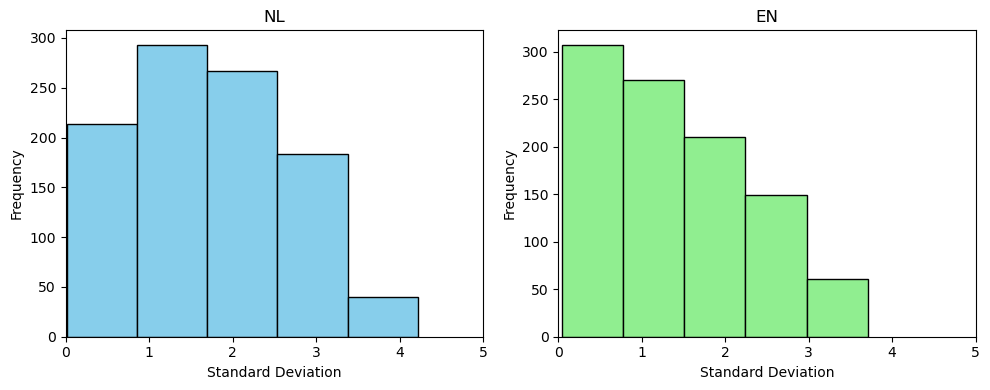

In [97]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 5

# Define bins
bins = 5

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Outliers**

#### **4.1. NL**

In [98]:
# Count outliers
print_outlier_counts(nl_pred)

No outliers found in columns: nl_pred_sl, nl_pred_sd


In [99]:
# Row outliers
print_outlier_data(nl_pred, 'nl_pred_sd')

No outliers found in nl_pred_sd


#### **4.2. EN**

In [100]:
# Count outliers
print_outlier_counts(en_pred)

Outliers in en_pred_sl: 5
No outliers found in columns: en_pred_sd


In [101]:
# Row outliers
print_outlier_data(en_pred, 'en_pred_sl')


Outliers in en_pred_sl:
             word1       word2  en_pred_sl  en_pred_sd
248          motor      engine        9.17        0.25
262     capability  competence        8.48        0.63
263      abundance      plenty        8.54        0.58
280  communication    language        8.47        0.80
287     competence     ability        8.81        0.46


#### **4.3. Add to Summary**

In [102]:
# Calculate outliers
outliers_nl_pred_sl = calculate_outliers(nl_pred, 'nl_pred_sl')
outliers_nl_pred_sd = calculate_outliers(nl_pred, 'nl_pred_sd')
outliers_en_pred_sl = calculate_outliers(en_pred, 'en_pred_sl')
outliers_en_pred_sd = calculate_outliers(en_pred, 'en_pred_sd')

# Count outliers
count_outliers_nl_pred_sl = outliers_nl_pred_sl.shape[0]
count_outliers_nl_pred_sd = outliers_nl_pred_sd.shape[0]
count_outliers_en_pred_sl = outliers_en_pred_sl.shape[0]
count_outliers_en_pred_sd = outliers_en_pred_sd.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_nl_pred_sl, count_outliers_en_pred_sl, count_outliers_nl_pred_sd, count_outliers_en_pred_sd], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,997.00,997.00,997.00,997.00
mean,3.39,2.72,1.70,1.39
std,2.41,2.08,0.96,0.91
min,0.00,0.02,0.01,0.04
25%,1.31,1.05,0.92,0.59
50%,3.16,2.10,1.67,1.23
75%,5.21,4.01,2.46,2.12
max,8.87,9.17,4.22,3.71
median,3.16,2.10,1.67,1.23
outliers,0.00,5.00,0.00,0.00


### **5. Correlation**

#### **5.1. SimLex-999 vs Standard Deviation**

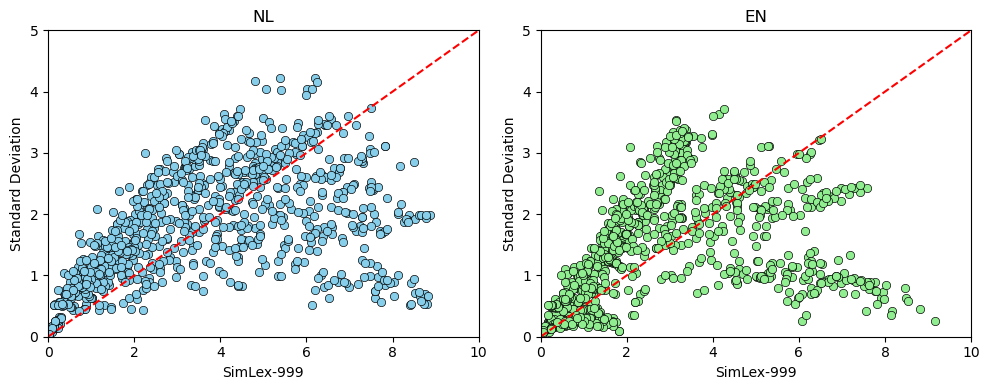

In [103]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10
y_min = 0
y_max = 5

# Create scatter plot
sns.scatterplot(x='nl_pred_sl', y='nl_pred_sd', data=nl_pred, ax=axes[0], color='skyblue', edgecolor='black')

# Plot diagonal line
axes[0].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Set labels and title
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('NL')

# Remove grid
axes[0].grid(False)

# Create scatter plot
sns.scatterplot(x='en_pred_sl', y='en_pred_sd', data=en_pred, ax=axes[1], color='lightgreen', edgecolor='black')

# Plot diagonal line
axes[1].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Set labels and title
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_title('EN')

# Remove grid
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

In [104]:
# List to store correlations
correlations_list = []

# Append correlations to list
correlations_list.append(calculate_correlation_and_pvalue(conc, 'nl_pred_sl', 'nl_pred_sd'))
correlations_list.append(calculate_correlation_and_pvalue(conc, 'en_pred_sl', 'en_pred_sd'))

# Convert list into Pandas DataFrame
correlation_df = pd.DataFrame(correlations_list)

# Show results
correlation_df

,simlex999,standard_deviation,correlation,p_value,significance
0,nl_pred_sl,nl_pred_sd,0.62842,1.139984e-110,significant
1,en_pred_sl,en_pred_sd,0.62215,7.005355e-108,significant


### **6. Evaluation Metrics**

#### **6.1. Spearmans's Rank Correlation**

##### **6.1.1. NL SimLex-999 vs EN SimLex-999**

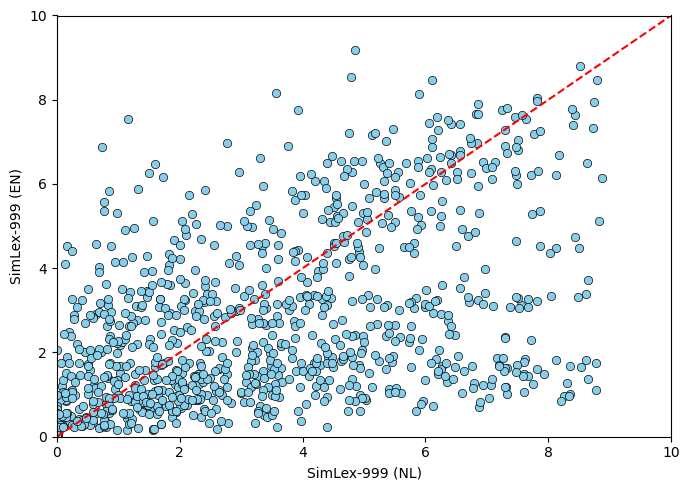

In [105]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sl', 'en_pred_sl', 'SimLex-999 (NL)', 'SimLex-999 (EN)', 0, 10, 0, 10)

In [106]:
# Correlation and pvalue
print_correlation_and_pvalue(conc, 'nl_pred_sl', 'en_pred_sl')

Spearman's Rank correlation: 0.52556
P-value: 6.862790734869425e-72
The correlation is statistically significant.



##### **6.1.2. NL Standard Deviation vs EN Standard Deviation**

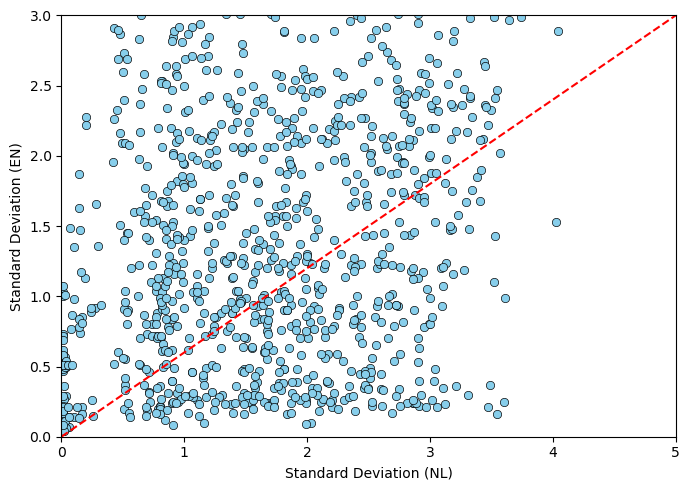

In [107]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sd', 'en_pred_sd', 'Standard Deviation (NL)', 'Standard Deviation (EN)', 0, 5, 0, 3)

In [108]:
# Correlation and p-value
print_correlation_and_pvalue(conc, 'nl_pred_sd', 'en_pred_sd')

Spearman's Rank correlation: 0.28305
P-value: 7.99334904964875e-20
The correlation is statistically significant.



#### **7.2. Mean Square Error (MSE)**

In [109]:
# Calculate Mean Squared Error
mse = mean_squared_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 5.55


#### **7.3. Mean Absolute Error (MAE)**

In [110]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1.74
